# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [18]:
#Install Citipy "!pip install citipy"
!pip install citipy

In [19]:
#Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
from datetime import datetime


#Import API keys (using the hidden bash_profile method from class)
from api_key import weather_key

#Citipy to determine city LAT and LNG
from citipy import citipy

#Incorporate the "cities.csv" file from 'Resources'
city_output_data_file = "output_data/cities.csv"

## Generate Cities List

In [20]:
# Create a range of Latitudes and Longitudes
lat_rang = (-90, 90)
lng_range = (-180, 180)

#List for holding lattitude/longitutde, cities, and countries
lat_lngs = []
cities = []
countries = []

#Create a set of random LAT/LNG combos. 
lat = np.random.uniform(low=-90.000, high=90.000, size=1500)
lng = np.random.uniform(low=-180.000, high=180.000, size=1500)
#Zip the above into a list of tuples
lat_lngs = zip(lat, lng)

# Using Citipy, find nearerst city for each lat/lng data set to return a unique country code
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    
    #If 'city' is unique, then add it to our cities list
    if city not in cities: 
        cities.append(city)
        countries.append(country)
        
#Combine the 'city' and 'country' lists into a list of TUPLES using zip( , ) fx
city_country = zip(cities, country)

print(len(cities))

613


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [21]:
print("Beginning Data Retrieval")
print("----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url= f"{base_url}appid={weather_key}&units={units}&q="

# Set up the lists to hold response info: 
city_list= []
cloud_list = []
country_list = []
date_list = []
humidity_list = []
lats_list = []
lngs_list = []
max_temp_list = []
wind_speed_list = []

#Set the index counter and set_counter
index_counter = 0
set_counter = 1

#For Loop matching city names with city_list using 'enumerate method'
for index, city in enumerate(cities, start =1):
    try:
        response = requests.get(query_url + city).json()
        city_list.append(response["name"])
        cloud_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lats_list.append(response["coord"]["lat"])
        lngs_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
            
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Recrod {index_counter} of Set {set_counter} : {city}")
        
    except(KeyError, IndexError):
            print("City is not found -- Skipping --")
            
print("--------------------------------")
print("Complete")


Beginning Data Retrieval
----------------------------
City is not found -- Skipping --
Processing Recrod 1 of Set 1 : kapaa
City is not found -- Skipping --
Processing Recrod 2 of Set 1 : ornskoldsvik
Processing Recrod 3 of Set 1 : namatanai
Processing Recrod 4 of Set 1 : mar del plata
Processing Recrod 5 of Set 1 : east london
City is not found -- Skipping --
Processing Recrod 6 of Set 1 : caico
City is not found -- Skipping --
Processing Recrod 7 of Set 1 : bredasdorp
Processing Recrod 8 of Set 1 : atuona
Processing Recrod 9 of Set 1 : zhigansk
Processing Recrod 10 of Set 1 : ushuaia
Processing Recrod 11 of Set 1 : ribeira grande
City is not found -- Skipping --
City is not found -- Skipping --
Processing Recrod 12 of Set 1 : nome
Processing Recrod 13 of Set 1 : lebu
Processing Recrod 14 of Set 1 : bluff
Processing Recrod 15 of Set 1 : richards bay
Processing Recrod 16 of Set 1 : espoo
Processing Recrod 17 of Set 1 : jamestown
Processing Recrod 18 of Set 1 : albany
Processing Recrod 

Processing Recrod 29 of Set 4 : srednekolymsk
Processing Recrod 30 of Set 4 : dingle
Processing Recrod 31 of Set 4 : haizhou
Processing Recrod 32 of Set 4 : kashi
Processing Recrod 33 of Set 4 : maceio
Processing Recrod 34 of Set 4 : berezovyy
Processing Recrod 35 of Set 4 : marbella
Processing Recrod 36 of Set 4 : narodychi
Processing Recrod 37 of Set 4 : luza
Processing Recrod 38 of Set 4 : khatanga
Processing Recrod 39 of Set 4 : oxapampa
Processing Recrod 40 of Set 4 : hirara
Processing Recrod 41 of Set 4 : ada
Processing Recrod 42 of Set 4 : baglan
City is not found -- Skipping --
Processing Recrod 43 of Set 4 : pangnirtung
Processing Recrod 44 of Set 4 : provideniya
Processing Recrod 45 of Set 4 : metro
Processing Recrod 46 of Set 4 : barrow
Processing Recrod 47 of Set 4 : vaini
Processing Recrod 48 of Set 4 : bud
Processing Recrod 49 of Set 4 : altay
Processing Recrod 50 of Set 4 : hammerfest
Processing Recrod 0 of Set 5 : sao jose da coroa grande
Processing Recrod 1 of Set 5 : 

Processing Recrod 13 of Set 8 : lithakia
Processing Recrod 14 of Set 8 : asahikawa
Processing Recrod 15 of Set 8 : yashkul
Processing Recrod 16 of Set 8 : souillac
Processing Recrod 17 of Set 8 : rio grande
Processing Recrod 18 of Set 8 : burnie
Processing Recrod 19 of Set 8 : paamiut
Processing Recrod 20 of Set 8 : oranjemund
Processing Recrod 21 of Set 8 : henties bay
Processing Recrod 22 of Set 8 : mongu
Processing Recrod 23 of Set 8 : oistins
Processing Recrod 24 of Set 8 : moorhead
Processing Recrod 25 of Set 8 : marienburg
Processing Recrod 26 of Set 8 : dalby
Processing Recrod 27 of Set 8 : port hardy
Processing Recrod 28 of Set 8 : marathon
Processing Recrod 29 of Set 8 : laguna
Processing Recrod 30 of Set 8 : flinders
City is not found -- Skipping --
Processing Recrod 31 of Set 8 : kuusamo
Processing Recrod 32 of Set 8 : mount isa
Processing Recrod 33 of Set 8 : apateu
Processing Recrod 34 of Set 8 : taoudenni
Processing Recrod 35 of Set 8 : yugorsk
Processing Recrod 36 of Set

Processing Recrod 49 of Set 11 : komsomolskiy
Processing Recrod 50 of Set 11 : ketchikan
Processing Recrod 0 of Set 12 : niimi
Processing Recrod 1 of Set 12 : miraflores
Processing Recrod 2 of Set 12 : ambilobe
--------------------------------
Complete


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [26]:
#Create the data frame to then put into a CSV file
#Dataframe from the using info from data retrieval 
weather_dataframe = pd.DataFrame({"City" : city_list,
                                  "Lat" : lats_list, 
                                  "Lng" : lngs_list,
                                  "Max Temp" : max_temp_list,
                                  "Humidity" : humidity_list,
                                  "Clouds" : cloud_list, 
                                  "Wind Speed" : wind_speed_list, 
                                  "Country" : country_list, 
                                  "Date" : date_list})

In [27]:
# weather_data.count()
# Display the dataframe "weather_data"
weather_dataframe.head()

,City,Lat,Lng,Max Temp,Humidity,Clouds,Wind Speed,Country,Date
0,Kapaa,22.08,-159.32,82.99,74,20,11.41,US,1602815670
1,Örnsköldsvik,63.29,18.72,35.60,100,1,8.05,SE,1602815886
2,Namatanai,-3.67,152.43,85.26,67,77,6.53,PG,1602815886
3,Mar del Plata,-38.00,-57.56,55.99,100,90,6.93,AR,1602815703
4,East London,-33.02,27.91,63.61,78,11,8.99,ZA,1602815668


In [29]:
#send the above weather_data into a CSV file
weather_dataframe.to_csv("output_data/cities.csv", index=False)

In [37]:
#Drop all the rows of data that have "Humidity > 100%"
weather_dataframe["Humidity"].max()

100

In [45]:
weather_dataframe.drop(weather_dataframe.loc[weather_dataframe['Humidity']==100].index, inplace=True)

In [47]:
#Check data frame to make sure humidity is gone
weather_dataframe.head()

,City,Lat,Lng,Max Temp,Humidity,Clouds,Wind Speed,Country,Date
0,Kapaa,22.08,-159.32,82.99,74,20,11.41,US,1602815670
2,Namatanai,-3.67,152.43,85.26,67,77,6.53,PG,1602815886
4,East London,-33.02,27.91,63.61,78,11,8.99,ZA,1602815668
5,Caicó,-6.46,-37.10,72.72,79,13,10.04,BR,1602815887
6,Bredasdorp,-34.53,20.04,51.80,93,100,4.70,ZA,1602815669


In [48]:
weather_dataframe["Humidity"].max()

99

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

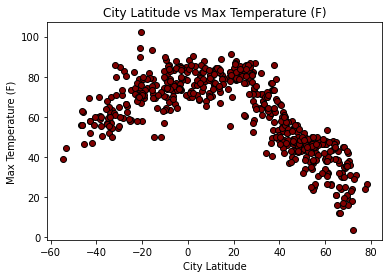

In [57]:
# Build a scatter plot for Lat Vs Temp in F
plt.scatter(weather_dataframe["Lat"], weather_dataframe["Max Temp"], color = "maroon", edgecolor = "black");

plt.title("City Latitude vs Max Temperature (F)")
plt.xlabel("City Latitude")
plt.ylabel("Max Temperature (F)")


#Save figure as a png into the out_putdata file
plt.savefig("output_data/City Latitude vs Max Temperature.png")


As expected, this plot is showing us that the closer the city is to the equator, the warmer the temperature. Something interesting to point out, it is colder 60 degree north of the equator than it is 60 degrees south of the midline. This changes with the earth's tilt. 

## Latitude vs. Humidity Plot

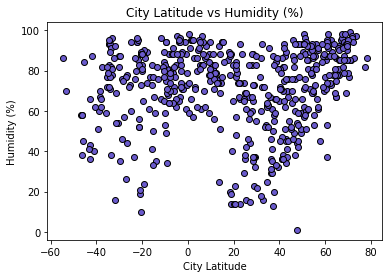

In [60]:
# Build a scatter plot for Lat Vs Humidity
plt.scatter(weather_dataframe["Lat"], weather_dataframe["Clouds"], color = "slateblue", edgecolor = "black");

plt.title("City Latitude vs Humidity (%)")
plt.xlabel("City Latitude")
plt.ylabel("Humidity (%)");


#Save figure as a png into the out_putdata file
plt.savefig("output_data/City Latitude vs Humidity.png")

Wow! It sure is humid the further north you travel. This could possible be impacted by weather or not there were storms in those certain cities. The majority of the cities in this dataframe are in humid climates. 

## Latitude vs. Cloudiness Plot

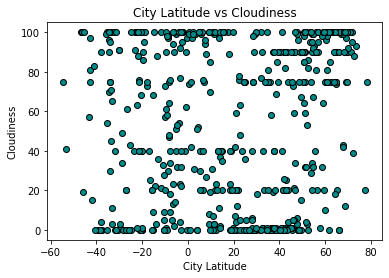

In [62]:
# Build a scatter plot for Lat Vs Cloudiness
plt.scatter(weather_dataframe["Lat"], weather_dataframe["Clouds"], color = "darkcyan", edgecolor = "black");

plt.title("City Latitude vs Cloudiness")
plt.xlabel("City Latitude")
plt.ylabel("Cloudiness");


#Save figure as a png into the out_putdata file
plt.savefig("output_data/City Latitude vs Cloudiness.png")

This plot is all over the map in terms of cloudiness. Again, as weather changes, cloudiness changes too. The cities with zero clouds are have a nice day, where the cities with complete coverage could be having overcast weather. 

## Latitude vs. Wind Speed Plot

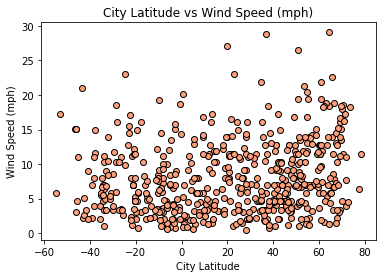

In [96]:
# Build a scatter plot for Lat Vs Wind Speed
plt.scatter(weather_dataframe["Lat"], weather_dataframe["Wind Speed"], color = "lightsalmon", edgecolor = "black");

plt.title("City Latitude vs Wind Speed (mph)")
plt.xlabel("City Latitude")
plt.ylabel("Wind Speed (mph)");


#Save figure as a png into the out_putdata file
plt.savefig("output_data/City Latitude vs Wind Speed.png")

An interesting find is that these cities all have relatively lower wind speed. The few cities that do have higher wind speeds will most likely have a higher percent of cloud coverage. 

## Linear Regression

In [97]:
#Create Northern and Southern hemisphere DataFrames
# 
north = weather_dataframe.Lat >= 0
south = weather_dataframe.Lat < 0

#Create N and S hemisphere DF...use 'boolean indexing' from the above
north_weather = (weather_dataframe[north].reset_index(drop=True))
south_weather = (weather_dataframe[south].reset_index(drop=True))

# north_weather.head()
# south_weather.head()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

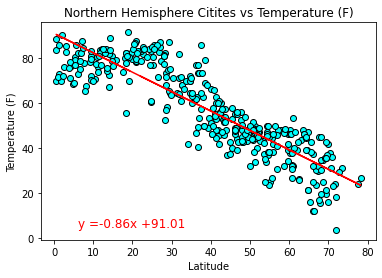

r-squared = -0.8834083137415668


<Figure size 432x288 with 0 Axes>

In [98]:
# Create a line of regression for North Hemisphere Max Temp vs Lat
x_values = north_weather["Lat"]
y_values = north_weather["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2));
plt.scatter(x_values, y_values, color="cyan", edgecolor="black");
plt.plot(x_values, regress_values,"r-");
plt.annotate(line_eq,(6,5), fontsize=12, color="red");
plt.xlabel("Latitude");
plt.ylabel("Temperature (F)");
plt.title("Northern Hemisphere Citites vs Temperature (F)");
plt.show();

print(f"r-squared = {rvalue}")

# #Save figure as a png into the out_putdata file
plt.savefig("output_data/North Hemisphere Latitude vs Temperature.png")

What we can see here is that there is a negative correlation between latitude and temp. As you travel furhter away from the equator, it gets colder. That make sense since Manitoba, Canada (53.76) is much colder than Los Angeles, California (34.05). 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

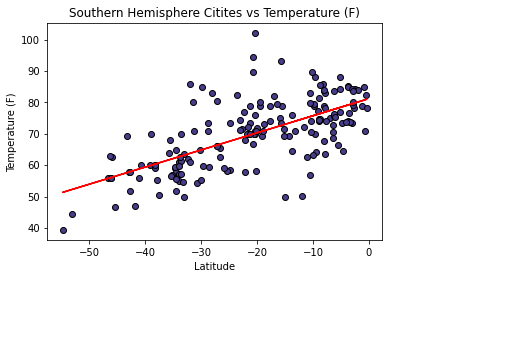

r-squared = 0.660674237154506


<Figure size 432x288 with 0 Axes>

In [99]:
# Create a line of regression for Southern Hemisphere Max Temp vs Lat
x_values = south_weather["Lat"]
y_values = south_weather["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2));
plt.scatter(x_values, y_values, color="darkslateblue", edgecolor="black");
plt.plot(x_values, regress_values,"r-");
plt.annotate(line_eq,(6,5), fontsize=12, color="red");
plt.xlabel("Latitude");
plt.ylabel("Temperature (F)");
plt.title("Southern Hemisphere Citites vs Temperature (F)");
plt.show();

print(f"r-squared = {rvalue}")

# #Save figure as a png into the out_putdata file
plt.savefig("output_data/South Hemisphere Latitude vs Temperature.png")

There is a positive correlation between the latitude and temperature in southern hemisphere cities. That makes sense, knowing the closer you go towards the equator the warmer the temp is.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

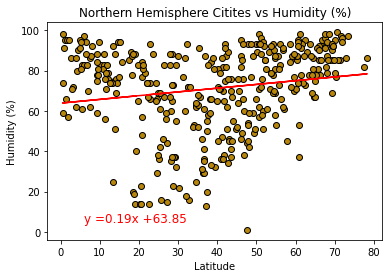

r-squared = 0.17836671775713953


<Figure size 432x288 with 0 Axes>

In [100]:
# Create a line of regression for North Hemisphere Humidity vs Lat
x_values = north_weather["Lat"]
y_values = north_weather["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2));
plt.scatter(x_values, y_values, color="darkgoldenrod", edgecolor="black");
plt.plot(x_values, regress_values,"r-");
plt.annotate(line_eq,(6,5), fontsize=12, color="red");
plt.xlabel("Latitude");
plt.ylabel("Humidity (%)");
plt.title("Northern Hemisphere Citites vs Humidity (%)");
plt.show();

print(f"r-squared = {rvalue}")

# #Save figure as a png into the out_putdata file
plt.savefig("output_data/North Hemisphere Latitude vs Humidity.png")

The positive correlation between North Hemisphere city latiude with humidity is not very strong. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

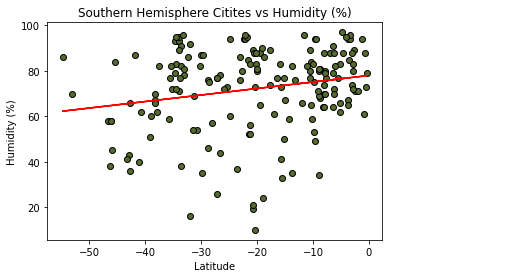

r-squared = 0.20578915361776903


<Figure size 432x288 with 0 Axes>

In [101]:
# Create a line of regression for Southern Hemisphere Humidity vs Lat
x_values = south_weather["Lat"]
y_values = south_weather["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2));
plt.scatter(x_values, y_values, color="darkolivegreen", edgecolor="black");
plt.plot(x_values, regress_values,"r-");
plt.annotate(line_eq,(6,5), fontsize=12, color="red");
plt.xlabel("Latitude");
plt.ylabel("Humidity (%)");
plt.title("Southern Hemisphere Citites vs Humidity (%)");
plt.show();

print(f"r-squared = {rvalue}")

# #Save figure as a png into the out_putdata file
plt.savefig("output_data/South Hemisphere Latitude vs Humidity.png")

Again, even in the southern hemisphere, the correlation with humidity is weak, but none the less positive. It makes sense that there is more humidity near the equator than further away. (Although, the south Artic sea has some serious storms on the occaion, just not now). 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

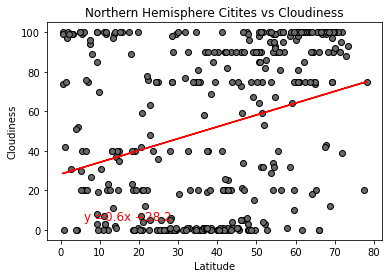

r-squared = 0.296544774176718


<Figure size 432x288 with 0 Axes>

In [102]:
# Create a line of regression for North Hemisphere Cloudiness vs Lat
x_values = north_weather["Lat"]
y_values = north_weather["Clouds"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2));
plt.scatter(x_values, y_values, color="dimgray", edgecolor="black");
plt.plot(x_values, regress_values,"r-");
plt.annotate(line_eq,(6,5), fontsize=12, color="red");
plt.xlabel("Latitude");
plt.ylabel("Cloudiness");
plt.title("Northern Hemisphere Citites vs Cloudiness");
plt.show();

print(f"r-squared = {rvalue}")

# #Save figure as a png into the out_putdata file
plt.savefig("output_data/North Hemisphere Latitude vs Cloudiness.png")

Surprinsgly, the correlation is positive between Northern Hemisphere cities and cloudiness. Even though this data is sporadic, I would expect this to be changing constantly. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

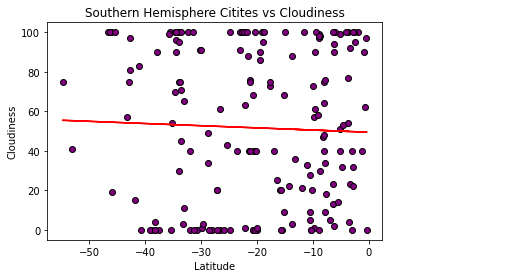

r-squared = -0.0380944359912646


<Figure size 432x288 with 0 Axes>

In [103]:
# Create a line of regression for Southern Hemisphere Cloudiness vs Lat
x_values = south_weather["Lat"]
y_values = south_weather["Clouds"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2));
plt.scatter(x_values, y_values, color="purple", edgecolor="black");
plt.plot(x_values, regress_values,"r-");
plt.annotate(line_eq,(6,5), fontsize=12, color="red");
plt.xlabel("Latitude");
plt.ylabel("Cloudiness");
plt.title("Southern Hemisphere Citites vs Cloudiness");
plt.show();

print(f"r-squared = {rvalue}")

# #Save figure as a png into the out_putdata file
plt.savefig("output_data/South Hemisphere Latitude vs Cloudiness.png")

With fewer data points, I'm suprised to learn this has a negative correlation. The closer you get to the equator there are less clouds. This relationship is weak with a low r-squared value of -0.03

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

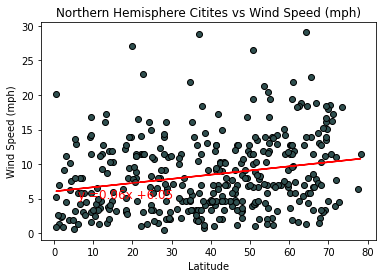

r-squared = 0.22545570635464338


<Figure size 432x288 with 0 Axes>

In [104]:
# Create a line of regression for North Hemisphere Wind Speed vs Lat
x_values = north_weather["Lat"]
y_values = north_weather["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2));
plt.scatter(x_values, y_values, color="darkslategrey", edgecolor="black");
plt.plot(x_values, regress_values,"r-");
plt.annotate(line_eq,(6,5), fontsize=12, color="red");
plt.xlabel("Latitude");
plt.ylabel("Wind Speed (mph)");
plt.title("Northern Hemisphere Citites vs Wind Speed (mph)");
plt.show();

print(f"r-squared = {rvalue}")

# #Save figure as a png into the out_putdata file
plt.savefig("output_data/North Hemisphere Latitude vs Wind Speed (mph).png")

There is a positive relationship between Wind speed and latitude. the further away you go travel north, the windier it will be. This isn't too strong. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

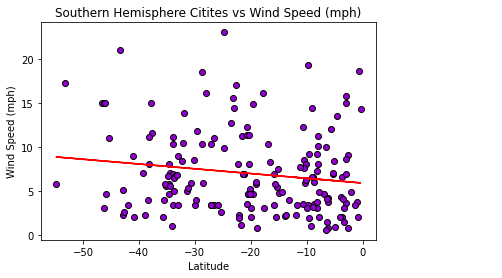

r-squared = -0.15601523482350188


<Figure size 432x288 with 0 Axes>

In [105]:
# Create a line of regression for Southern Hemisphere Wind Speed (mph) vs Lat
x_values = south_weather["Lat"]
y_values = south_weather["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2));
plt.scatter(x_values, y_values, color="darkviolet", edgecolor="black");
plt.plot(x_values, regress_values,"r-");
plt.annotate(line_eq,(6,5), fontsize=12, color="red");
plt.xlabel("Latitude");
plt.ylabel("Wind Speed (mph)");
plt.title("Southern Hemisphere Citites vs Wind Speed (mph)");
plt.show();

print(f"r-squared = {rvalue}")

# #Save figure as a png into the out_putdata file
plt.savefig("output_data/South Hemisphere Latitude vs wind Speed (mph).png")

There is netagive correlation with latitude and wind speed. Compared to the graph above, it looks like it just keep getting windier the further north you travel!